# Load Boston

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


### Attribute Information (in order):

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per ten thousand dollars
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [2]:
data = load_boston()

In [3]:
initial_dataset = pd.DataFrame(data.data, columns =data.feature_names)
house_price =pd.Series(data.target, name='house_price')

# Providing columns more descriptive names
original_columns = list(initial_dataset.columns)
descriptive_columns = ['per_capita_crime_rate', 'land_zoned_proportion', 'industry_proportion', 'charles_river_dummy', 'nitric_oxide_conc', 'average_rooms', 'proportion_of_old', 'weighted_distances', 'highway_accessibilty', 'property_tax_rate', 'pupil_per_teacher', 'blacks_ratio', 'percentage_lower_status', 'median_value_homes']
column_dictionary = dict(zip(original_columns, descriptive_columns))
initial_dataset = initial_dataset.rename(columns=column_dictionary)
first_combination = pd.concat([initial_dataset, house_price], axis=1)
first_combination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   per_capita_crime_rate    506 non-null    float64
 1   land_zoned_proportion    506 non-null    float64
 2   industry_proportion      506 non-null    float64
 3   charles_river_dummy      506 non-null    float64
 4   nitric_oxide_conc        506 non-null    float64
 5   average_rooms            506 non-null    float64
 6   proportion_of_old        506 non-null    float64
 7   weighted_distances       506 non-null    float64
 8   highway_accessibilty     506 non-null    float64
 9   property_tax_rate        506 non-null    float64
 10  pupil_per_teacher        506 non-null    float64
 11  blacks_ratio             506 non-null    float64
 12  percentage_lower_status  506 non-null    float64
 13  house_price              506 non-null    float64
dtypes: float64(14)
memory usag

<Figure size 720x360 with 0 Axes>

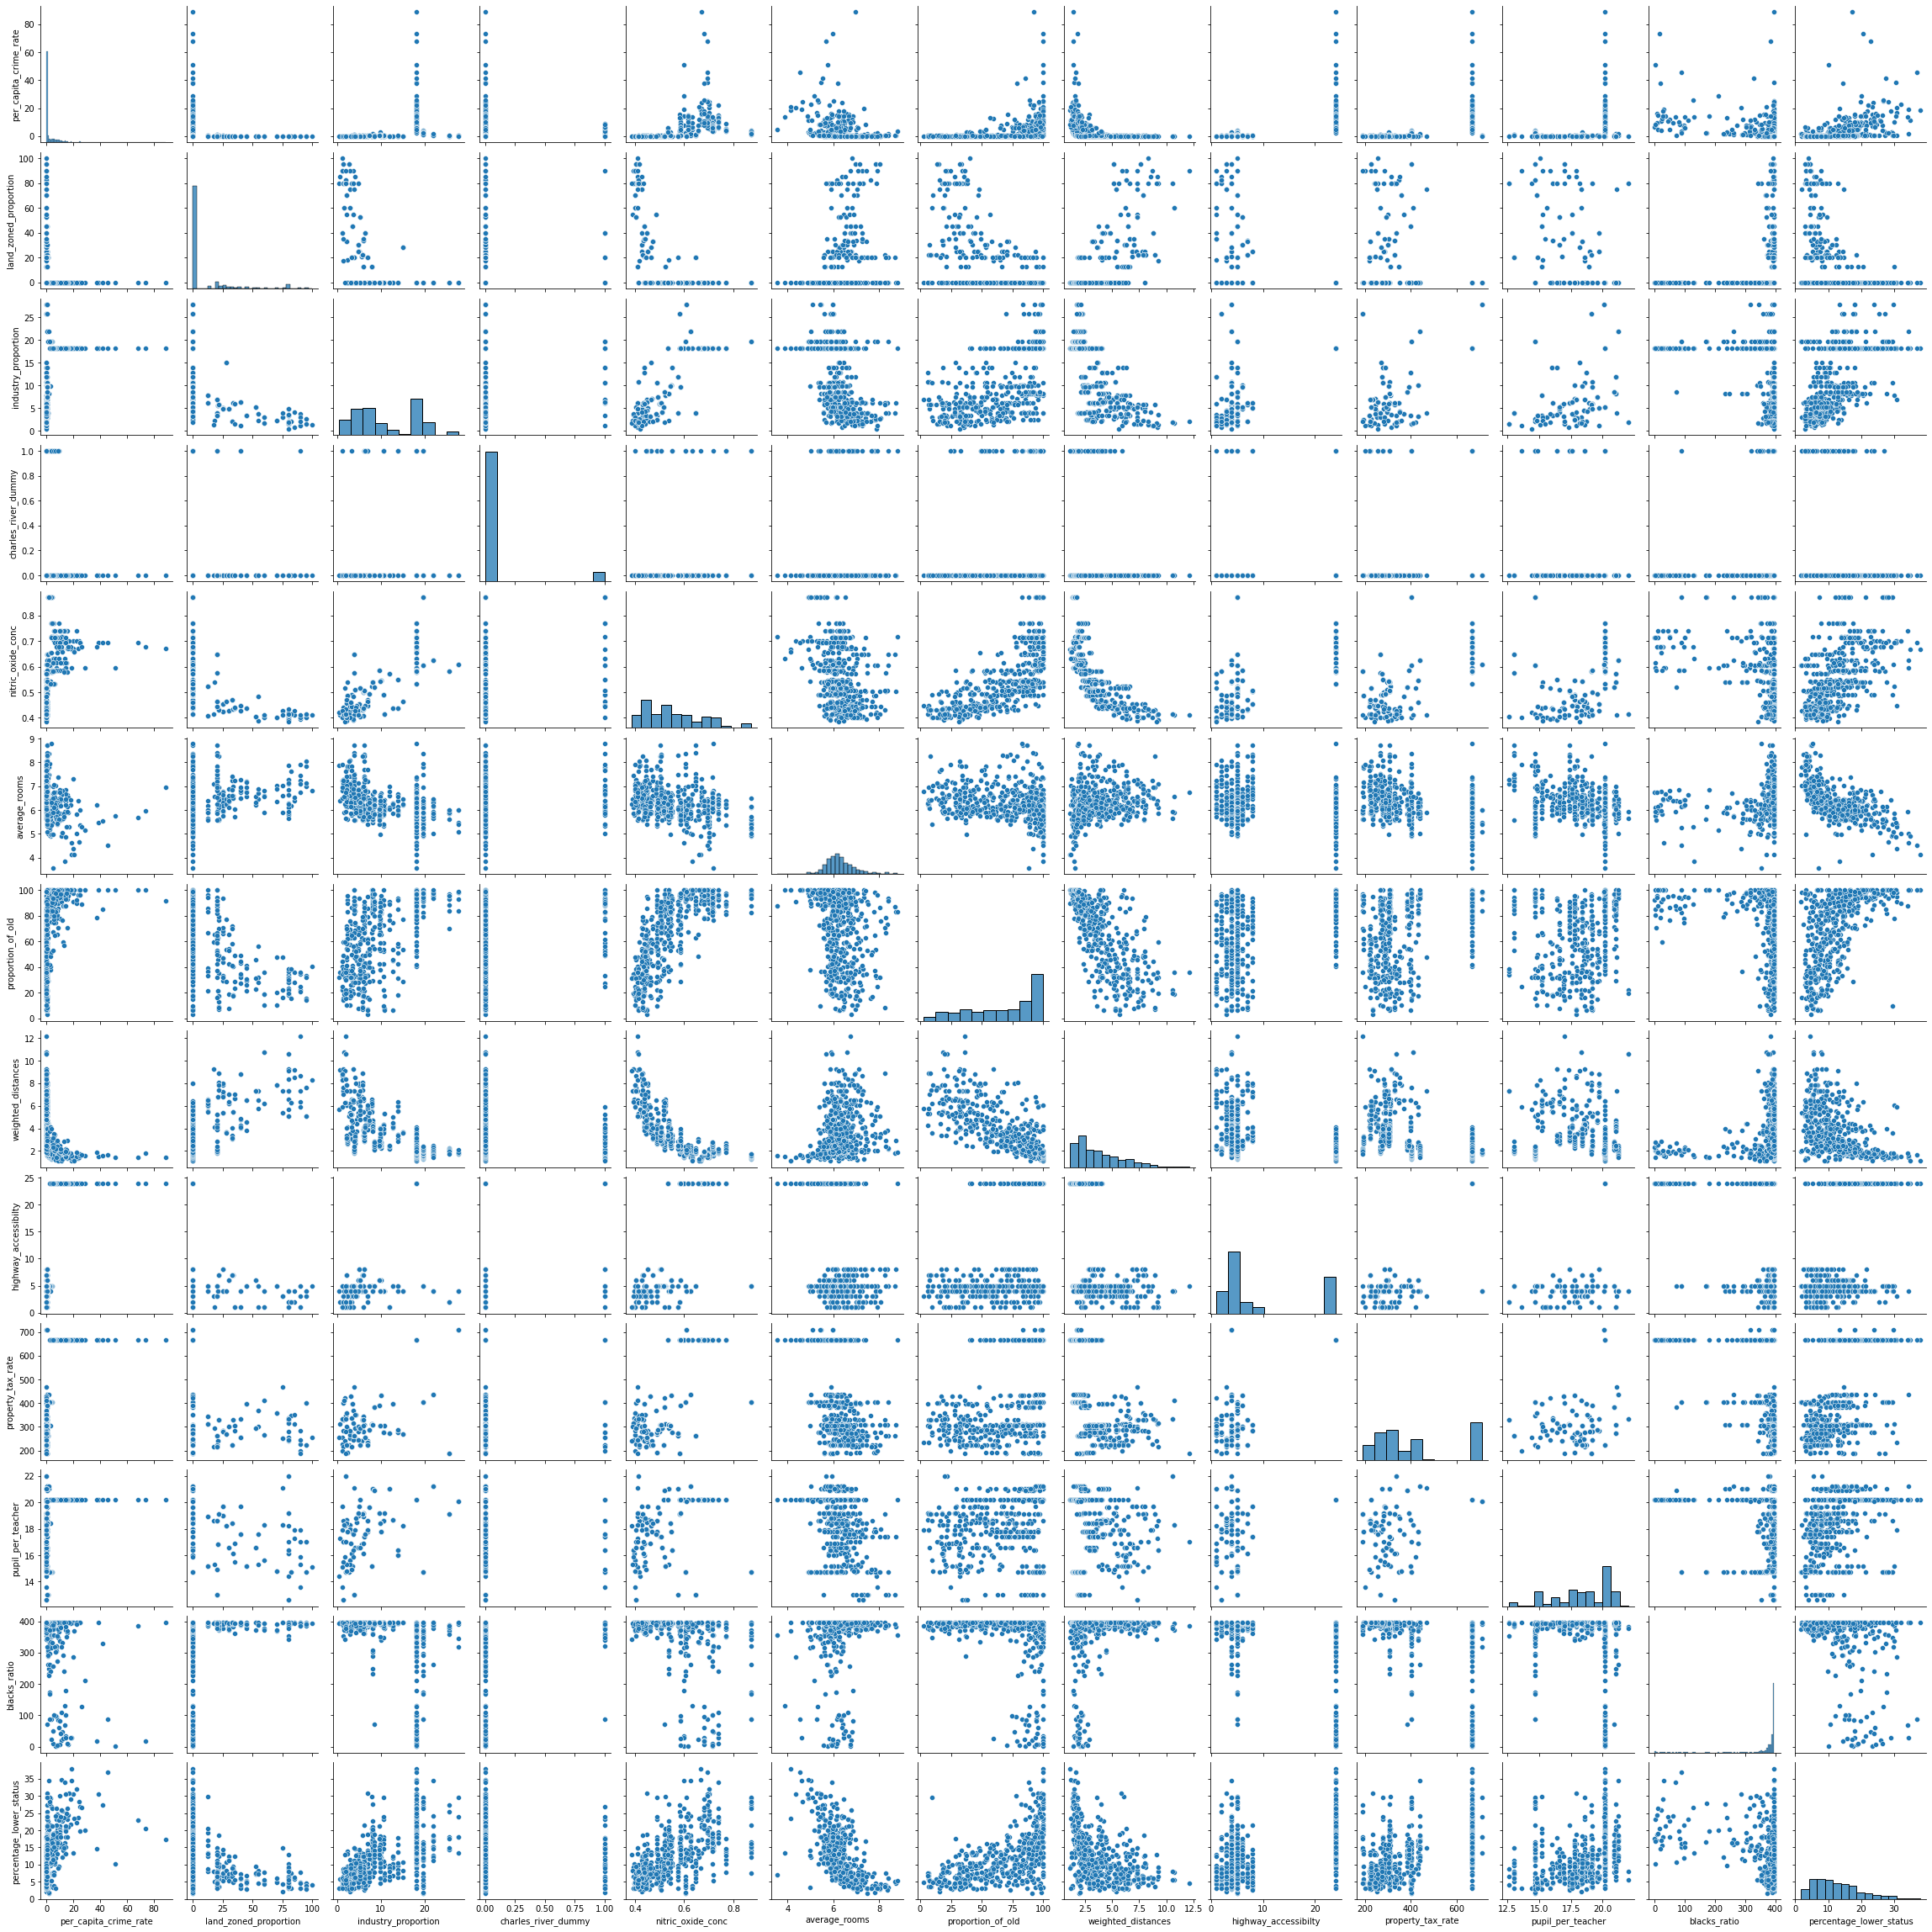

In [4]:
plt.figure(figsize=(10, 5))
sns.pairplot(initial_dataset)

In [5]:
initial_dataset.describe()

,per_capita_crime_rate,land_zoned_proportion,industry_proportion,charles_river_dummy,nitric_oxide_conc,average_rooms,proportion_of_old,weighted_distances,highway_accessibilty,property_tax_rate,pupil_per_teacher,blacks_ratio,percentage_lower_status
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
for column in first_combination.columns:
    print(f" The feature {column} has {len(first_combination[column].unique())} features.")

 The feature per_capita_crime_rate has 504 features.
 The feature land_zoned_proportion has 26 features.
 The feature industry_proportion has 76 features.
 The feature charles_river_dummy has 2 features.
 The feature nitric_oxide_conc has 81 features.
 The feature average_rooms has 446 features.
 The feature proportion_of_old has 356 features.
 The feature weighted_distances has 412 features.
 The feature highway_accessibilty has 9 features.
 The feature property_tax_rate has 66 features.
 The feature pupil_per_teacher has 46 features.
 The feature blacks_ratio has 357 features.
 The feature percentage_lower_status has 455 features.
 The feature house_price has 229 features.


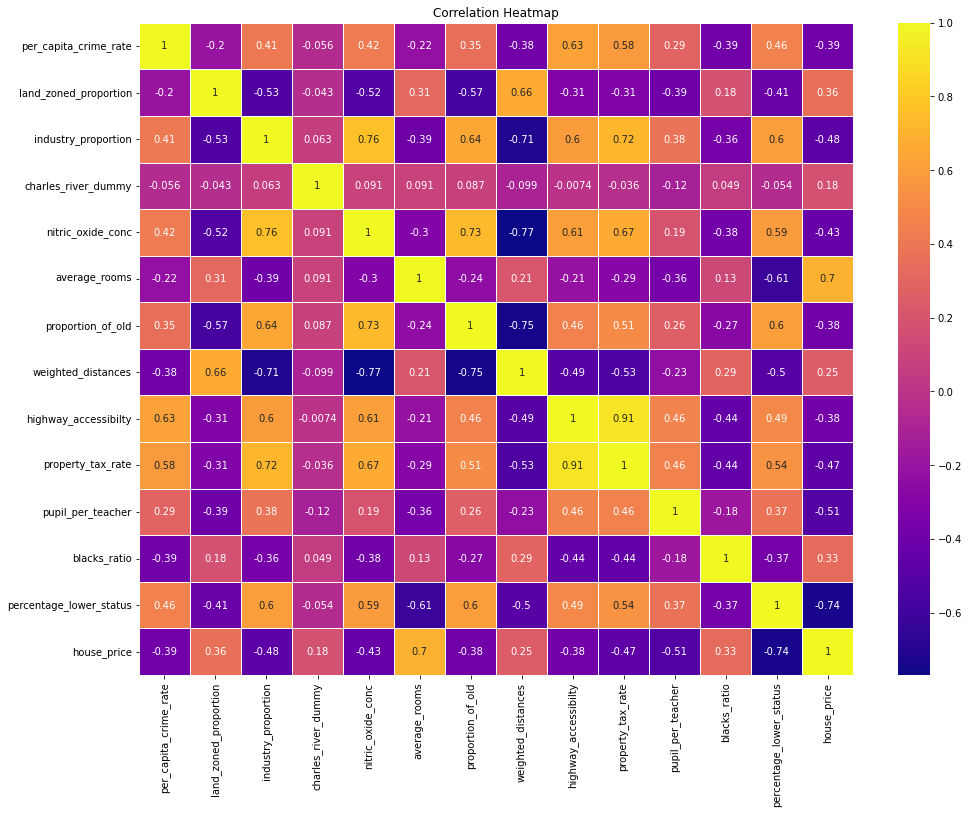

In [7]:
correlation_matrix = first_combination.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation analysis
- There is a decent positive correlation between average rooms and price
- Inversely there is a moderate negative relationship between price and industry proportion, property tax rate, pupil per teacher
- There a significant negative correlation between percentage status and house price

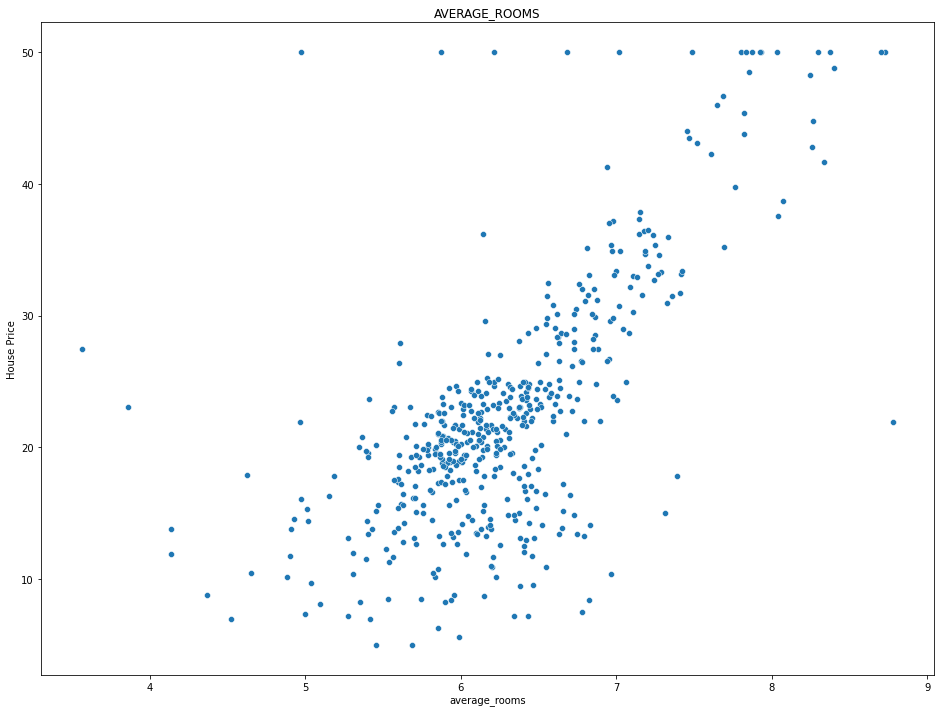

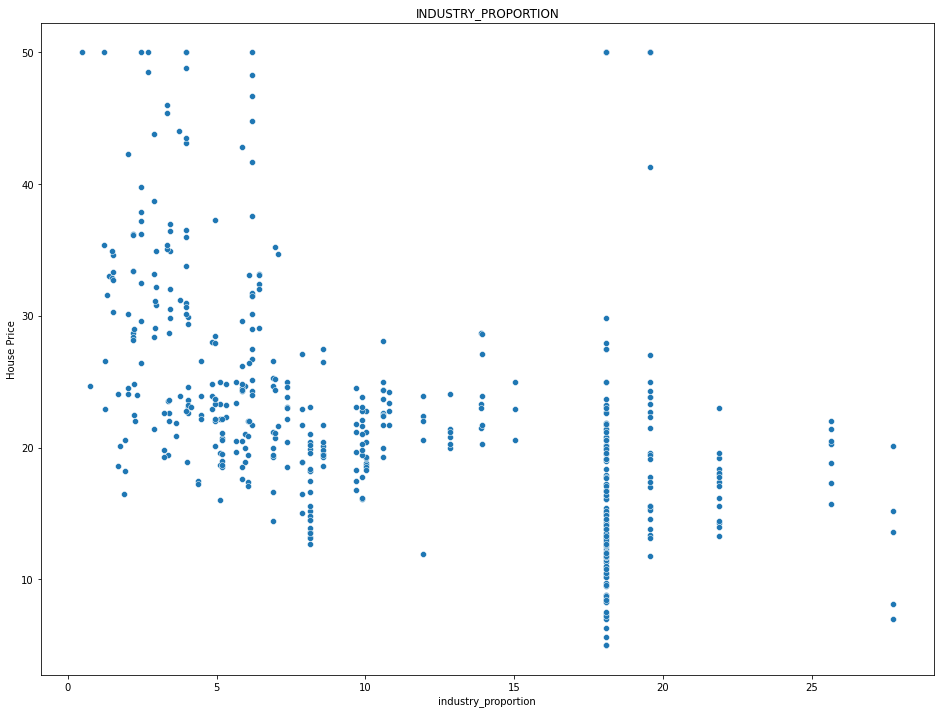

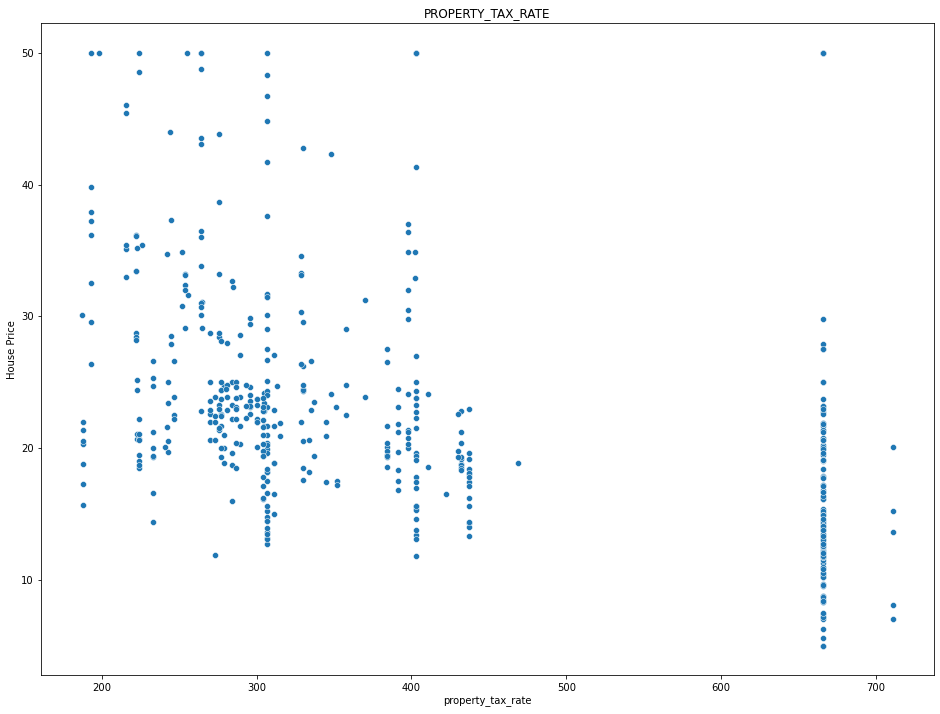

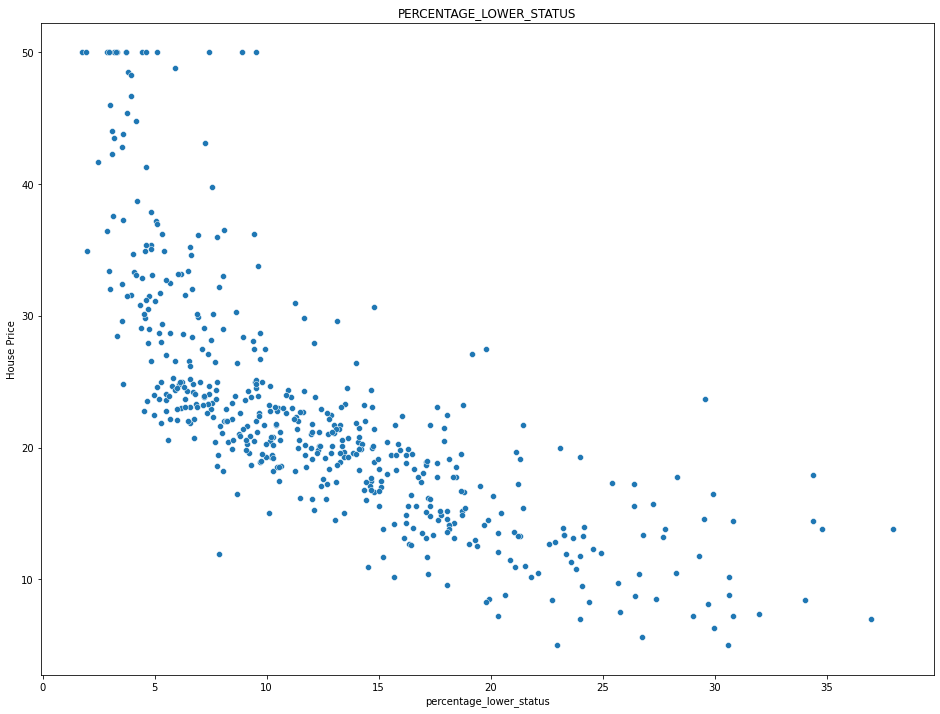

In [8]:
correlation_columns = ['average_rooms', 'industry_proportion', 'property_tax_rate', 'percentage_lower_status']
for column in correlation_columns:
    plt.figure(figsize=(16, 12))
    sns.scatterplot(first_combination[column], first_combination['house_price'], palette='plasma')
    plt.title(column.upper())
    plt.xlabel(column)
    plt.ylabel('House Price')
    plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(first_combination.iloc[:, :-1], first_combination['house_price'], test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The mean squared error is {mse} \n the root mean squared error is {rmse}")

The mean squared error is 24.29111947497371 
 the root mean squared error is 4.928602182665355


In [11]:
r_squared_error = r2_score(y_test, y_pred)


def adjusted_r2_score(y_true, y_pred, num_predictors):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_predictors - 1)
    return adjusted_r2

adjusted_r_squared =adjusted_r2_score(y_test, y_pred, initial_dataset.shape[1])

print(f"The r squared measure for the model is {r_squared_error} .\n the adjusted r squared measure for the mdoel is {adjusted_r_squared}")

The r squared measure for the model is 0.6687594935356294 .
 the adjusted r squared measure for the mdoel is 0.6198262368988473


In [12]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The mean squared error is {mse} \n the root mean squared error is {rmse}")

r_squared_error = r2_score(y_test, y_pred)


def adjusted_r2_score(y_true, y_pred, num_predictors):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_predictors - 1)
    return adjusted_r2

adjusted_r_squared =adjusted_r2_score(y_test, y_pred, initial_dataset.shape[1])

print(f"The r squared measure for the model is {r_squared_error} .\n the adjusted r squared measure for the mdoel is {adjusted_r_squared}")

The mean squared error is 24.409489761299696 
 the root mean squared error is 4.94059609372186
The r squared measure for the model is 0.6671453631686305 .
 the adjusted r squared measure for the mdoel is 0.6179736554549056


In [13]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The mean squared error is {mse} \n the root mean squared error is {rmse}")

r_squared_error = r2_score(y_test, y_pred)


def adjusted_r2_score(y_true, y_pred, num_predictors):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_predictors - 1)
    return adjusted_r2

adjusted_r_squared =adjusted_r2_score(y_test, y_pred, initial_dataset.shape[1])

print(f"The r squared measure for the model is {r_squared_error} .\n the adjusted r squared measure for the mdoel is {adjusted_r_squared}")

The mean squared error is 24.477191227708673 
 the root mean squared error is 4.947442897872463
The r squared measure for the model is 0.6662221670168519 .
 the adjusted r squared measure for the mdoel is 0.6169140780534322


In [14]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The mean squared error is {mse} \n the root mean squared error is {rmse}")

r_squared_error = r2_score(y_test, y_pred)


def adjusted_r2_score(y_true, y_pred, num_predictors):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_predictors - 1)
    return adjusted_r2

adjusted_r_squared =adjusted_r2_score(y_test, y_pred, initial_dataset.shape[1])

print(f"The r squared measure for the model is {r_squared_error} .\n the adjusted r squared measure for the mdoel is {adjusted_r_squared}")

The mean squared error is 24.477191227708673 
 the root mean squared error is 4.947442897872463
The r squared measure for the model is 0.6662221670168519 .
 the adjusted r squared measure for the mdoel is 0.6169140780534322


In [15]:


# Create the Random Forest Regressor model
rf = RandomForestRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [95, 96, 97, 98, 99, 100, 102, 101, 103, 104],
    'max_depth': [None, 17, 18, 19, 16, 20, 21, 22, 23],
    'min_samples_split': [3],
    'min_samples_leaf': [1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 98}
Best Score: 0.8294529469554742


In [18]:
RandomForestModel = RandomForestRegressor(**grid_search.best_params_)
RandomForestModel.fit(X_train, y_train)
y_pred = RandomForestModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The mean squared error is {mse} \n the root mean squared error is {rmse}")

r_squared_error = r2_score(y_test, y_pred)


def adjusted_r2_score(y_true, y_pred, num_predictors):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_predictors - 1)
    return adjusted_r2

adjusted_r_squared =adjusted_r2_score(y_test, y_pred, initial_dataset.shape[1])

print(f"The r squared measure for the model is {r_squared_error} .\n the adjusted r squared measure for the mdoel is {adjusted_r_squared}")

dump(RandomForestModel, "./../../savedModels/random_forest.joblib")

The mean squared error is 8.839644794677087 
 the root mean squared error is 2.973154014624383
The r squared measure for the model is 0.8794601285555965 .
 the adjusted r squared measure for the mdoel is 0.8616531020922187


['./../../savedModels/random_forest.joblib']

In [ ]:
def y_pred_plot(y_pred, y_test):
    # Create a scatter plot
    plt.figure(figsize=(16, 12))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')

    # Add labels and title
    plt.xlabel('Data Points')
    plt.ylabel('Target Variable')
    plt.title('Comparison of Predicted and True Values')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

    
y_pred_plot(y_pred, y_test)